## Import Dependencies

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

## import the dataset to work with
# I am using the header argument so that the first row of data does not turn into the 
# column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', delimiter = '\t',
                  header = -1)
# now I am renaming the columsn appropriately
data.columns = ['frequency', 'attack_angle', 'chord_length', 'velocity', 'disp_thickness', 'sound_pressure']
data.head()

,frequency,attack_angle,chord_length,velocity,disp_thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [14]:
X = data.drop('sound_pressure', axis = 1)
y = data['sound_pressure']

## Set up your train test split

In [15]:
from sklearn.cross_validation import train_test_split

## splitting our data into 70% training and 30% testing with test size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

## Build Base Model

In [19]:
# Instantiate our model
lr = LinearRegression()

# fit our model on our predefined training data
lr_fit = lr.fit(X_train, y_train)

#creating a set of predictions for our y_test data
y_preds = lr_fit.predict(X_test)

## Evaluating Base Model

Linear Regression Explained Variance Score:  0.523758846533
Linear Regression Absolute Error:  3.67473106542
Linear Regression Mean Squared Error:  22.3959466438
Linear Regression Median Absolute Error:  2.91408164807
Linear Regression R-Sqaured Score:  0.523656976493


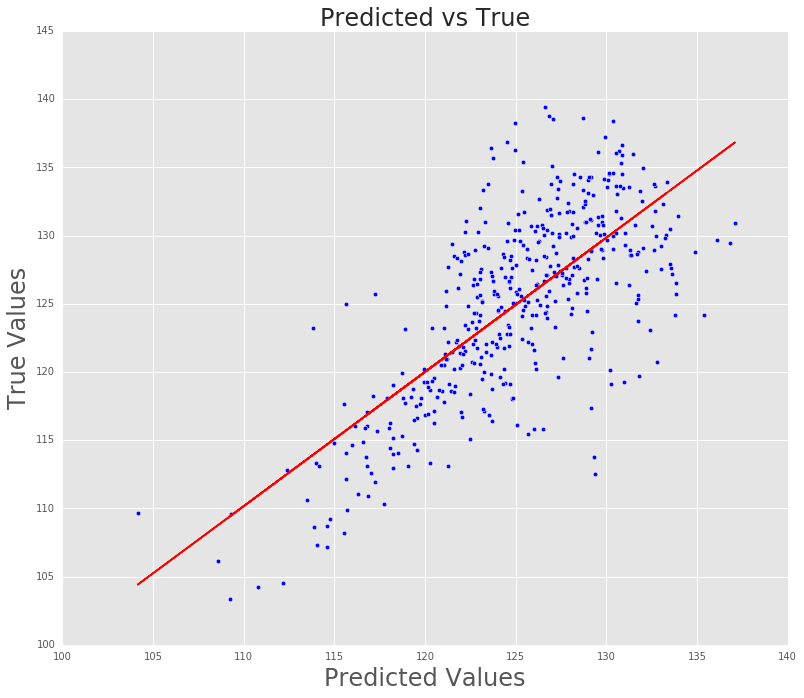

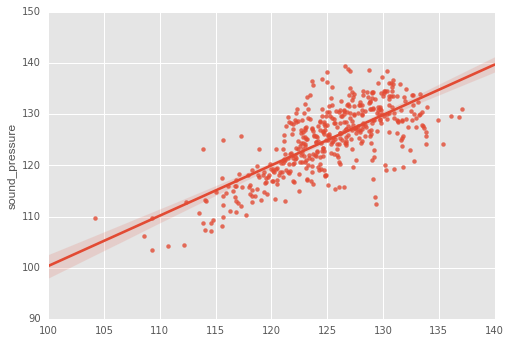

In [27]:
'''
Regression Metrics
'''
modelname = "Linear Regression"

explained_variance_score = metrics.explained_variance_score(y_test, y_preds)
absolute_error = metrics.mean_absolute_error(y_test, y_preds)
mean_squared_error = metrics.mean_squared_error(y_test, y_preds)
median_absolute_error = metrics.median_absolute_error(y_test, y_preds)
r2_score = metrics.r2_score(y_test, y_preds)

print modelname,"Explained Variance Score: ",explained_variance_score
print modelname,"Absolute Error: ",absolute_error
print modelname,"Mean Squared Error: ",mean_squared_error
print modelname,"Median Absolute Error: ",median_absolute_error
print modelname,"R-Sqaured Score: ",r2_score



# choosing a background style for our graph
plt.style.use('ggplot')

# increasing the size of the figure
plt.figure(figsize = (13, 11))

# plot predicted values vs true values
plt.scatter(y_preds,y_test)

# plot best fit line (r^2)
fit = np.polyfit(y_preds, y_test, deg=1)
plt.plot(y_preds, fit[0] * y_preds + fit[1], color='red')

#giving the graph a title
plt.title('Predicted vs True', fontsize = 24)

# set labels
plt.ylabel('True Values', fontsize = 24)
plt.xlabel('Predicted Values', fontsize = 24)
plt.show()
